# COVID-19 Data Analysis

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#### loading the datset

In [3]:
# loading the dataset from a CSV file
df= pd.read_csv('country_wise_latest.csv')  



In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


#### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

### Observation
+ The dataset contains country-wise COVID-19 statistics including confirmed cases, deaths, recoveries, and active cases.

## Data cleaning and preprocessing

In [9]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

#### missing values


In [10]:
# miissing values
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

#### checking duplicate values


In [11]:
# checking duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
# Normalize column names safely
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
)

print(df.columns)


Index(['country/region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases',
       'recovered_/_100_cases', 'deaths_/_100_recovered',
       'confirmed_last_week', '1_week_change', '1_week_%_increase',
       'who_region'],
      dtype='object')


In [13]:
df.dtypes

country/region             object
confirmed                   int64
deaths                      int64
recovered                   int64
active                      int64
new_cases                   int64
new_deaths                  int64
new_recovered               int64
deaths_/_100_cases        float64
recovered_/_100_cases     float64
deaths_/_100_recovered    float64
confirmed_last_week         int64
1_week_change               int64
1_week_%_increase         float64
who_region                 object
dtype: object

# insight 
- dataset was already clean no missing values and no duplicate values
- Columns are well named and there is no need for renaming them

# Exploratory Data Analysis

### Top 10 Countries by Confirmed Cases

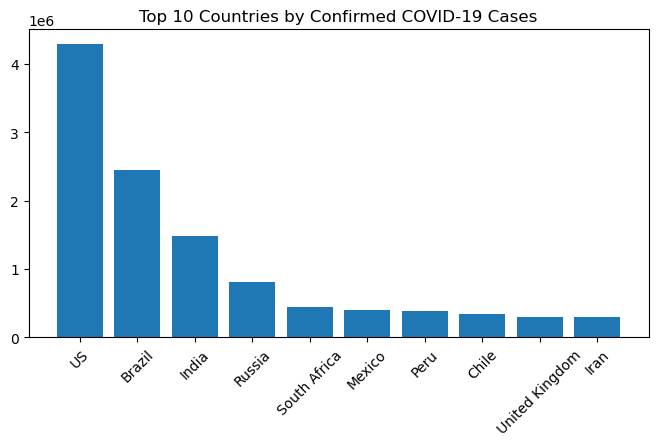

<Figure size 640x480 with 0 Axes>

In [14]:

top_confirmed = df.sort_values(by="confirmed", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_confirmed["country/region"], top_confirmed["confirmed"])
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xticks(rotation=45)
plt.show()
# save the plot 
plt.savefig('plots/top_10_countries_confirmed_cases.png')

## Insight:

- Countries with larger populations  report higher confirmed cases.

### Top 10 Countries by Deaths

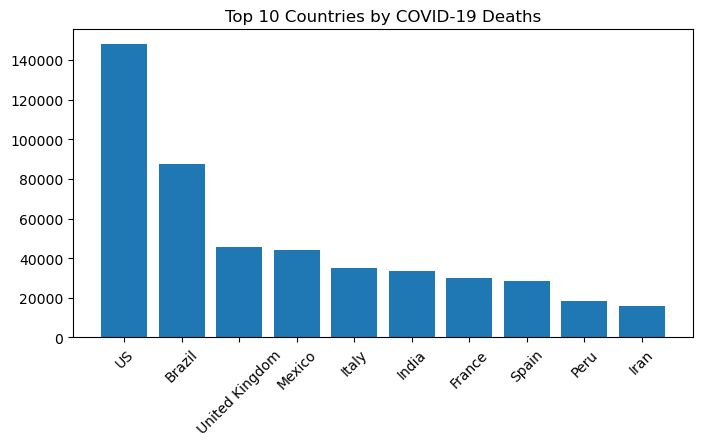

<Figure size 640x480 with 0 Axes>

In [15]:
top_deaths = df.sort_values(by="deaths", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_deaths["country/region"], top_deaths["deaths"])
plt.title("Top 10 Countries by COVID-19 Deaths")
plt.xticks(rotation=45)
plt.show()
# save the plot 
plt.savefig('plots/top_10_countries_deaths.png')

## insight:
- Countries with higher confirmed cases also tend to have higher death counts.
  

### Active vs Recovered Cases

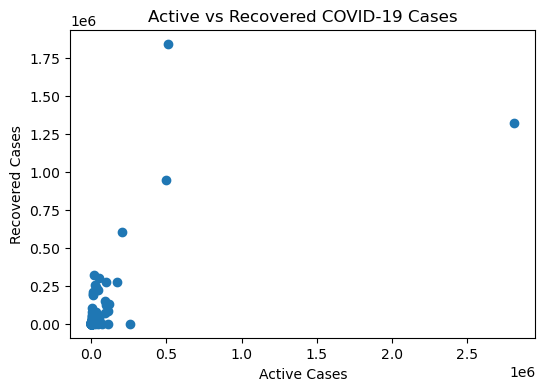

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(df["active"], df["recovered"])
plt.xlabel("Active Cases")
plt.ylabel("Recovered Cases")
plt.title("Active vs Recovered COVID-19 Cases")
plt.show()
# save the plot
plt.savefig('plots/active_vs_recovered_cases.png')



## insight:
- Countries with high active cases also tend to have higher recovery rates.

## Analytical Questions & Answer

## 1. Which country has the highest confirmed cases?

In [17]:
df.loc[df["confirmed"].idxmax(), "country/region"]


'US'

## Answer:

- ### according to the data USA has the highest confirmed cases


## 2. Which country has the highest deaths?

In [18]:
df.loc[df["deaths"].idxmax(), "country/region"]


'US'

## Answer:
- ### according to the data USA has the highest death rates

## 3. Which country has the highest recoveries?


In [19]:
df.loc[df["recovered"].idxmax(), "country/region"]


'Brazil'

## Answer:
- ###  according to dataset Brazl have highest recovries 

## 4. Which country has the most active cases?

In [20]:
df.loc[df["active"].idxmax(), "country/region"]


'US'

# Answer :
- ### according to the dataset USA has the most active cases 

## 5. confirmed cases related to deaths?

## Answer:

- ## Yes, higher confirmed cases generally result in higher deaths.

## 6. Is recovery higher in countries with more confirmed cases?

## Answer:

- ## Yes, recovery increases with confirmed cases.

## 7. Which country has the lowest deaths?

In [21]:
df.loc[df["deaths"].idxmin(), "country/region"]


'Bhutan'

## Answer:
- ### according to the dataset bhutan has the lowest deaths


## 8.Which country has the lowest confirmed cases?

In [22]:
df.loc[df["confirmed"].idxmin(), "country/region"]


'Western Sahara'

## Answer:
- ### according to the dataset Western Sahara has the lowest confirmed cases

## 9. Do active cases vary widely across countries?
## Answer:
- ### Yes, there is a large variation.

## 10. Is mortality rate same across all countries?
## Answer:
- ###  vary significantly.

## 11. Is recovery rate higher than death rate globally?
## Answer:
- ### Yes, recovery rate is higher than death rate globally.

## 12. Are most cases concentrated in a few countries?
## Answer:
- ### Yes.

## 13. Does population density influence spread?
## Answer:
- ### Not available in this dataset, so cannot be analyzed.

# Statistical Tests

## Test 1: Pearson Correlation (Confirmed vs Deaths)

In [24]:
stats.pearsonr(df["confirmed"], df["deaths"])
#if else condoition output
if stats.pearsonr(df["confirmed"], df["deaths"])[0] > 0.7:
    print("Strong positive correlation")
elif stats.pearsonr(df["confirmed"], df["deaths"])[0] < -0.7:
    print("Strong negative correlation")
else:
    print("Weak or no correlation") 


Strong positive correlation


## INTERPRETATION
- ## A strong positive correlation indicates that as confirmed cases increase, deaths also tend to increase.

## Test 2: Pearson Correlation (Confirmed vs Recovered)

In [25]:
stats.pearsonr(df["confirmed"], df["recovered"])
#if else condoition output
if stats.pearsonr(df["confirmed"], df["recovered"])[0] > 0.7:
    print("Strong positive correlation")
elif stats.pearsonr(df["confirmed"], df["recovered"])[0] < -0.7:
    print("Strong negative correlation")
else:
    print("Weak or no correlation")

Strong positive correlation


## INTERPRETATION

- ## A strong positive correlation indicates that as confirmed cases increase, recoveries also tend to increase.

## Test 3: Independent T-Test (Deaths vs Recovered)

In [26]:
stats.ttest_ind(df["deaths"], df["recovered"])
#if else condition output
if stats.ttest_ind(df["deaths"], df["recovered"])[1] < 0.05:
    print("Significant difference between deaths and recoveries")
else:
    print("No significant difference between deaths and recoveries")
    

Significant difference between deaths and recoveries


## INTERPRETATION
- ## The significant difference shows recoveries are much higher than deaths.

## Test 4: One-Way ANOVA (Confirmed vs Deaths vs Recovered)

In [27]:
stats.f_oneway(df["confirmed"], df["deaths"], df["recovered"])
#if else condition output
if stats.f_oneway(df["confirmed"], df["deaths"], df["recovered"])[1] < 0.05:
    print("Significant differences among confirmed, deaths, and recoveries")
else:
    print("No significant differences among confirmed, deaths, and recoveries")
    

Significant differences among confirmed, deaths, and recoveries


## interpretation
- ## Mean values of confirmed, deaths, and recovered cases differ significantly.

## Test 5: Shapiro-Wilk Normality Test

In [28]:
stats.shapiro(df["confirmed"])
stats.shapiro(df["deaths"])
stats.shapiro(df["recovered"])
#if else condition output
if stats.shapiro(df["confirmed"])[1] < 0.05:
    print("Confirmed cases data is not normally distributed")
else:
    print("Confirmed cases data is normally distributed")


Confirmed cases data is not normally distributed


## interpretation
- ## Confirmed cases are not normally distributed across countries.

# Conclusion

### This project analyzed a country-wise COVID-19 dataset to understand the distribution of confirmed cases, deaths, recoveries, and active cases. The analysis showed that COVID-19 impact varied greatly across countries, with a strong relationship between confirmed cases and deaths. Statistical tests confirmed significant differences between key variables. Overall, the project demonstrates effective application of data cleaning, visualization, and statistical analysis techniques.